In [24]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


In [25]:
#Fetch Images count from Fodlers

In [26]:
count = 0 
base_dir = r"C:\Users\Lenovo\Desktop\final\dataset"
dirs = os.listdir(base_dir)

for folder_name in dirs:
    folder_path = os.path.join(base_dir, folder_name)
    files = os.listdir(folder_path)
    print(f"{folder_name} Folder has {len(files)} Images")
    count += len(files)

print(f"Images Folder has {count} Images")

ants Folder has 998 Images
bees Folder has 999 Images
beetle Folder has 831 Images
catterpillar Folder has 868 Images
earthworms Folder has 646 Images
earwig Folder has 932 Images
grasshopper Folder has 970 Images
moth Folder has 994 Images
slug Folder has 782 Images
snail Folder has 1000 Images
wasp Folder has 982 Images
weevil Folder has 970 Images
Images Folder has 10972 Images


In [27]:
#Load Images into Arrays as Dataset

In [28]:
base_dir = r'C:\Users\Lenovo\Desktop\final\dataset'
img_size = 180
batch = 32

In [51]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 10972 files belonging to 12 classes.
Using 8778 files for training.
Found 10972 files belonging to 12 classes.
Using 2194 files for validation.


In [30]:
pest_names = train_ds.class_names
pest_names

['ants',
 'bees',
 'beetle',
 'catterpillar',
 'earthworms',
 'earwig',
 'grasshopper',
 'moth',
 'slug',
 'snail',
 'wasp',
 'weevil']

In [31]:
import matplotlib.pyplot as plt

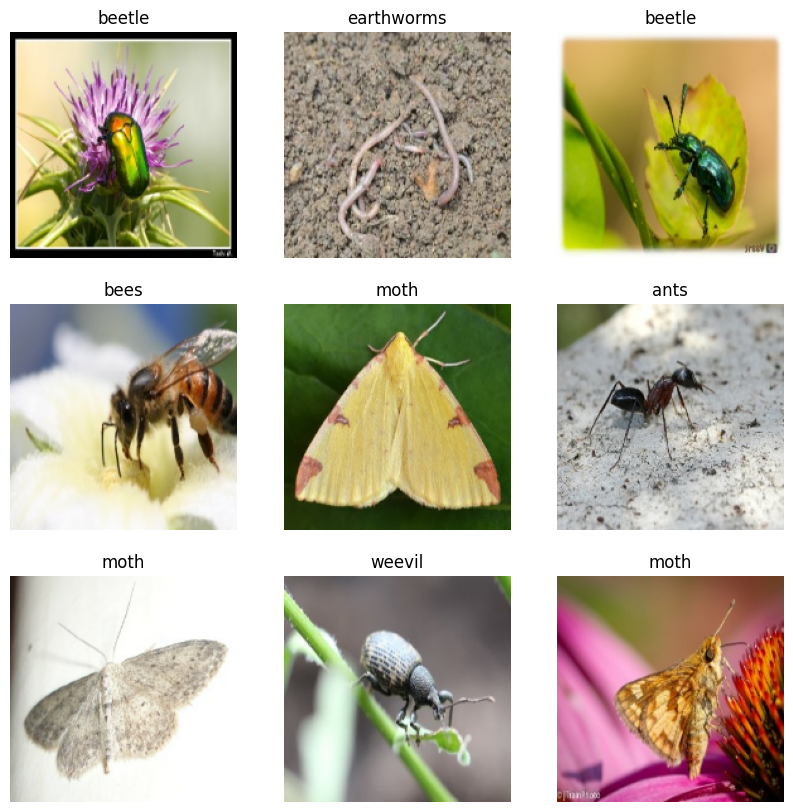

In [32]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(pest_names[labels[i]])
        plt.axis('off')

In [33]:
AUTOTUNE = tf.data.AUTOTUNE

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [35]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [36]:
#Data Augmentation

In [37]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

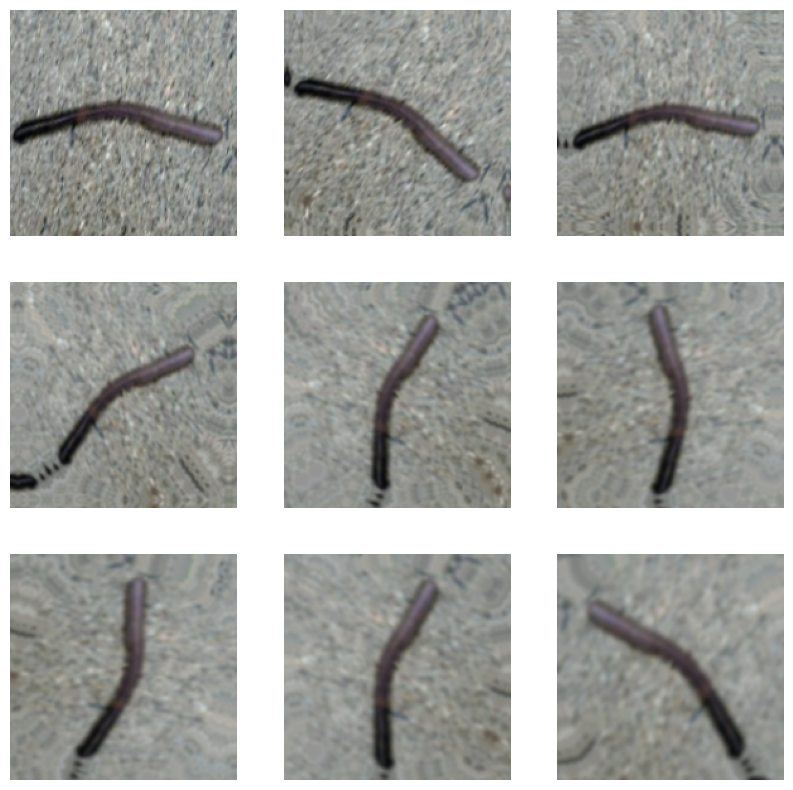

In [38]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [39]:
#MOdel Creation

In [40]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12)
])

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 80s 274ms/step - accuracy: 0.1749 - loss: 2.3521 - val_accuracy: 0.3897 - val_loss: 1.8591
Epoch 2/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 76s 274ms/step - accuracy: 0.3902 - loss: 1.8390 - val_accuracy: 0.3902 - val_loss: 1.7944
Epoch 3/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 73s 265ms/step - accuracy: 0.4445 - loss: 1.6659 - val_accuracy: 0.4635 - val_loss: 1.6305
Epoch 4/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 73s 264ms/step - accuracy: 0.4776 - loss: 1.5408 - val_accuracy: 0.4690 - val_loss: 1.5403
Epoch 5/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 80s 291ms/step - accuracy: 0.5161 - loss: 1.4334 - val_accuracy: 0.5219 - val_loss: 1.4454
Epoch 6/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 80s 291ms/step - accuracy: 0.5615 - loss: 1.3034 - val_accuracy: 0.5223 - val_loss: 1.4505
Epoch 7/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 80s 290ms/step - accuracy: 0.5857 - loss: 1.2485 - val_accuracy: 0.5333 - val_loss: 1.3759
Epoch 8/50
275/275 ━━━━━━━━━━━━━━━━━━━━ 78s 283ms/step - accuracy: 0.6172 - loss: 1

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │           1,548 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,970,566 (45.66 MB)

 Trainable params: 3,990,188 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,980,378 (30.44 MB)

In [44]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + pest_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [45]:
classify_images(r"C:\Users\Lenovo\Desktop\final\archive\test\weevil\Weevil (952).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


'The Image belongs to weevil with a score of 87.88115978240967'

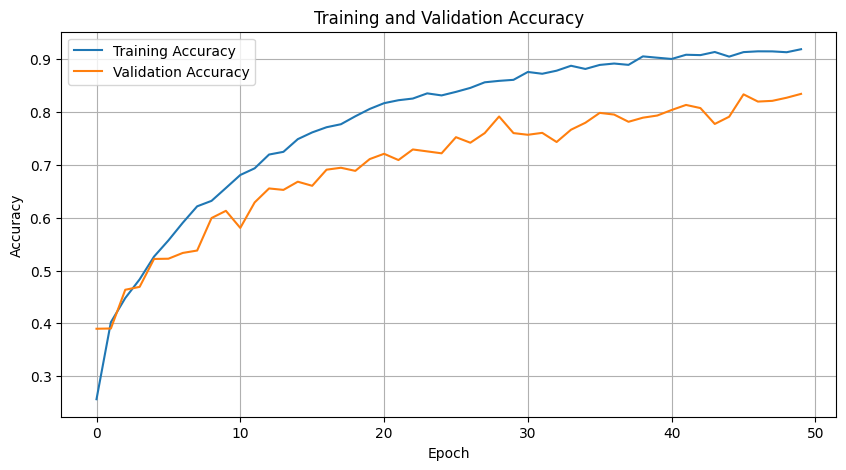

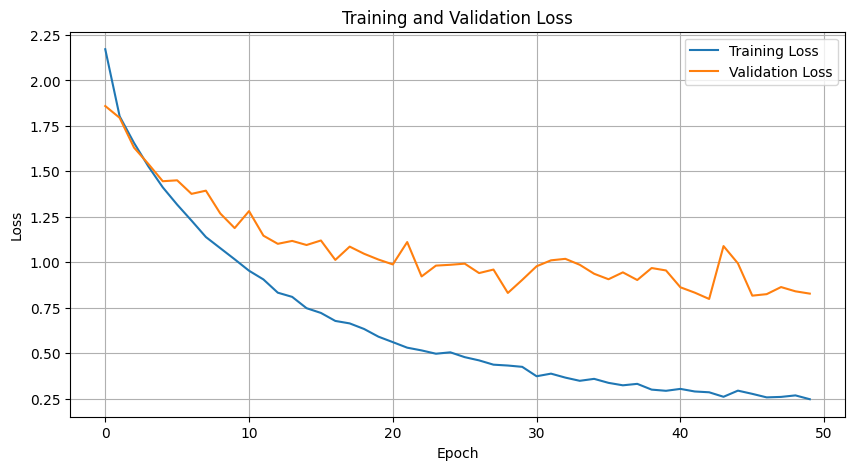

In [46]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [55]:
import tensorflow as tf
model.save(r"C:\Users\Lenovo\Desktop\final\pest_Recog_Model3.keras")

In [57]:
import tensorflow as tf

# Load the saved model
model = tf.keras.models.load_model(r"C:\Users\Lenovo\Desktop\final\pest_Recog_Model.keras")

# Save the model using the native Keras format
tf.keras.models.save_model(model, r"C:\Users\Lenovo\Desktop\final\pest_Recog_Model.h5")


ValueError: File not found: filepath=C:\Users\Lenovo\Desktop\final\pest_Recog_Model.keras. Please ensure the file is an accessible `.keras` zip file.

In [53]:
from sklearn.metrics import classification_report

# Evaluate the model
loss, accuracy = model.evaluate(val_ds)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

# Predict the classes for the validation set
val_predictions = model.predict(val_ds)
val_pred_classes = np.argmax(val_predictions, axis=1)

# Get true labels by iterating over the validation dataset
val_true_classes = []
for images, labels in val_ds:
    val_true_classes.extend(labels.numpy())

# Calculate additional evaluation metrics
print("Classification Report:")
print(classification_report(val_true_classes, val_pred_classes))


69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.8431 - loss: 0.8553
Validation Loss: 0.8292
Validation Accuracy: 0.8345
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.07      0.06      0.06       189
           1       0.07      0.06      0.07       206
           2       0.09      0.09      0.09       162
           3       0.05      0.07      0.06       184
           4       0.07      0.07      0.07       135
           5       0.08      0.06      0.07       186
           6       0.10      0.10      0.10       184
           7       0.10      0.10      0.10       191
           8       0.03      0.03      0.03       171
           9       0.07      0.07      0.07       188
          10       0.09      0.09      0.09       200
          11       0.07      0.07      0.07       198

    accuracy                           0.07      2194
   macro avg       0.07      0.07      0.07      2194